
Titanic

# Análisis Exploratorio de Datos.

## Importar las librerias necesarias.

In [ ]:
# Importamos las librerías necesarias.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Preparación de los datos
from sklearn import preprocessing

In [ ]:
# Herramienta para dividir los datos en prueba y entrenamiento 
from sklearn.model_selection import RepeatedKFold,train_test_split

In [ ]:
# Import de los modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
# Importa las metricas
from sklearn import metrics

## Cargar fuentes de datos

In [ ]:
# Cargamos el dataset de titanic para comenzar a trabajarlo.
titanic = sns.load_dataset(name = "titanic")

## Exploración de los datos.

In [ ]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
print(titanic.count())

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64


In [ ]:
print(titanic.shape)

(891, 15)


In [ ]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
print(titanic.groupby(['class']).size())

class
First     216
Second    184
Third     491
dtype: int64


## Propuesta de limpieza.

In [ ]:
titanic["sex"] = titanic["sex"].astype("string")

In [ ]:
titanic["embarked"] = titanic["embarked"].astype("string")

In [ ]:
titanic["who"] = titanic["who"].astype("string")

In [ ]:
titanic["embark_town"] = titanic["embark_town"].astype("string")

In [ ]:
titanic["alive"] = titanic["alive"].astype("string")

In [ ]:
def remove_null_age(row) -> int:
    '''
    function to check if the "age" is null and replace wth the mean from 
    the mean "age" dataframe
    '''
    if pd.isnull(row['age']):
        return mean_age[row['sex'], row['class'], row['alone'], row['survived']]
    else:
        return row['age']

mean_age: int = titanic.groupby(['sex', 'class', 'alone', 'survived'])['age'].mean().round().astype(int)

titanic['age'] = titanic.apply(remove_null_age, axis = 1)
titanic['age'] = titanic['age'].round().astype(int)

In [ ]:
titanic["Rango edad"] = pd.qcut(x = titanic['age'], q = 10, precision = 10)

In [ ]:
def sex_int(row) -> int:
  if row['sex'] == "female":
    return int(0)
  elif row['sex'] == "male":
    return int(1)

titanic['Sexo num'] = titanic.apply(sex_int, axis = 1)
titanic['Sexo num'] = titanic['Sexo num'].astype(int)

In [ ]:
def adult_male_int(row) -> int:
  if row['adult_male'] == True:
    return int(1)
  elif row['adult_male'] == False:
    return int(0)

titanic['Hombre adulto num'] = titanic.apply(adult_male_int, axis = 1)
titanic['Hombre adulto num'] = titanic['Hombre adulto num'].astype(int)

In [ ]:
titanic = titanic.rename(columns = {
    "survived": "Sobrevivió",
    "pclass": "pclass",
    "sex": "Sexo",
    "age": "Edad",
    "sibsp": "sibsp",
    "parch": "Tostar",
    "fare": "Tarifa",
    "embarked": "Embarcado",
    "class": "Clase",
    "who": "Quién",
    "adult_male": "Hombre adulto",
    "deck": "Plataforma",
    "embark_town": "embark_town",
    "alive": "Vivo",
    "alone": "Solo"
})

In [ ]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sobrevivió         891 non-null    int64   
 1   pclass             891 non-null    int64   
 2   Sexo               891 non-null    string  
 3   Edad               891 non-null    int64   
 4   sibsp              891 non-null    int64   
 5   Tostar             891 non-null    int64   
 6   Tarifa             891 non-null    float64 
 7   Embarcado          889 non-null    string  
 8   Clase              891 non-null    category
 9   Quién              891 non-null    string  
 10  Hombre adulto      891 non-null    bool    
 11  Plataforma         203 non-null    category
 12  embark_town        889 non-null    string  
 13  Vivo               891 non-null    string  
 14  Solo               891 non-null    bool    
 15  Rango edad         891 non-null    category
 16  Sexo num

## Identificación de correlación en las columnas.

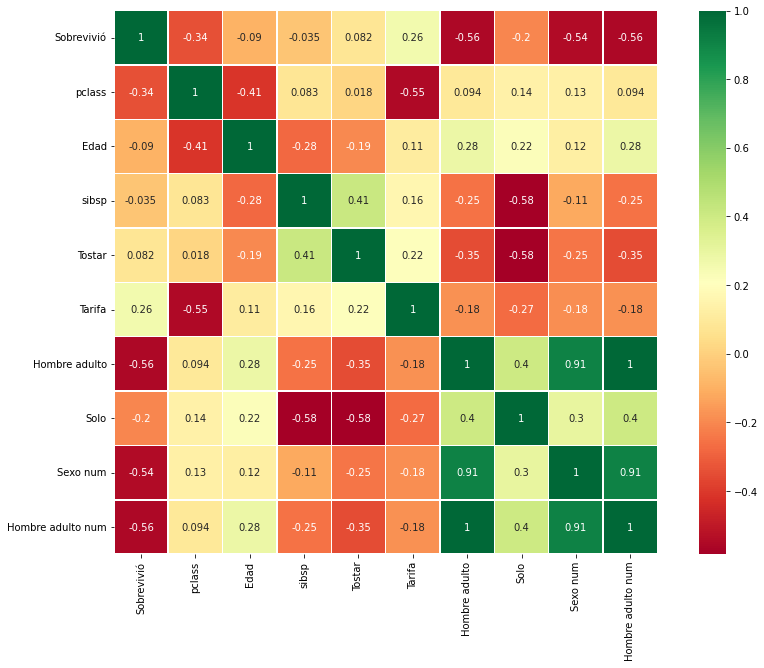

In [ ]:
# Correlación de los datos
data = titanic.corr()

sns.heatmap(data = data,
            annot = True,
            cmap = "RdYlGn",
            square = True,
            linewidths = float(0.5))

plt.gcf().set_size_inches(15, 10)

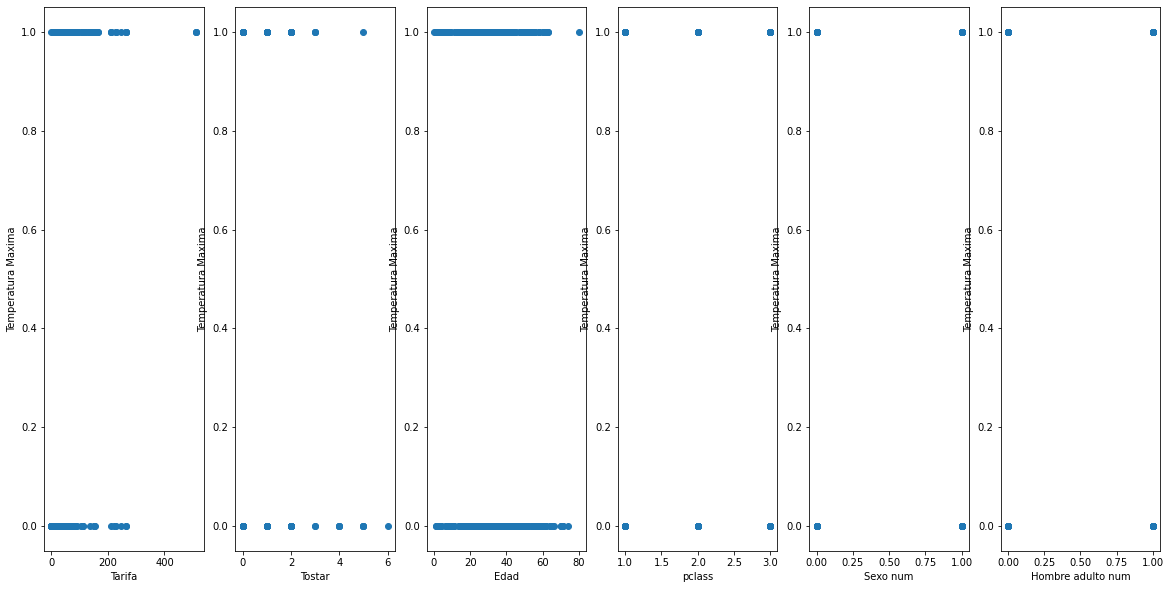

In [ ]:
caracteristicas: list = [
    "Tarifa",
    "Tostar",
    "Edad",
    "pclass",
    "Sexo num",
    "Hombre adulto num"
]

# Lo siguiente en caso de que existan valores nulos en las columnas seleccionadas

for col in caracteristicas:
  titanic[col].fillna(titanic[col].mean(),inplace=True)

maxTemp = titanic["Sobrevivió"]
plt.figure(
    figsize=(20,10)
)
for pivote,col in enumerate(caracteristicas):
  plt.subplot(
      1,
      len(caracteristicas),
      pivote+1
  )
  plt.scatter(
      titanic[col],
      maxTemp
  )

  plt.xlabel(col)
  plt.ylabel("Temperatura Maxima")

plt.show()

## Gráficos.

### Gráfico 1

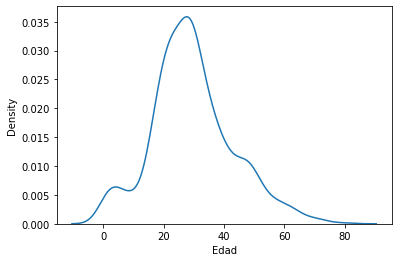

In [ ]:
sns.kdeplot(titanic.Edad)

### Gráfico 2

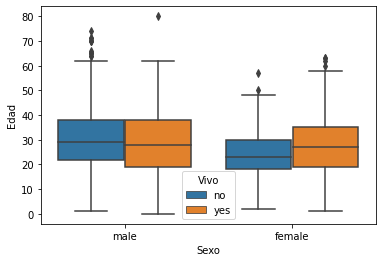

In [ ]:
# Variables gráfico.
x: str = str("Sexo")
y: str = str("Edad")
hue: str = str("Vivo")
data = titanic



# Gráfico.
sns.boxplot(x = x,
            y = y,
            hue = hue,
            data = data)

### Gráfico 3

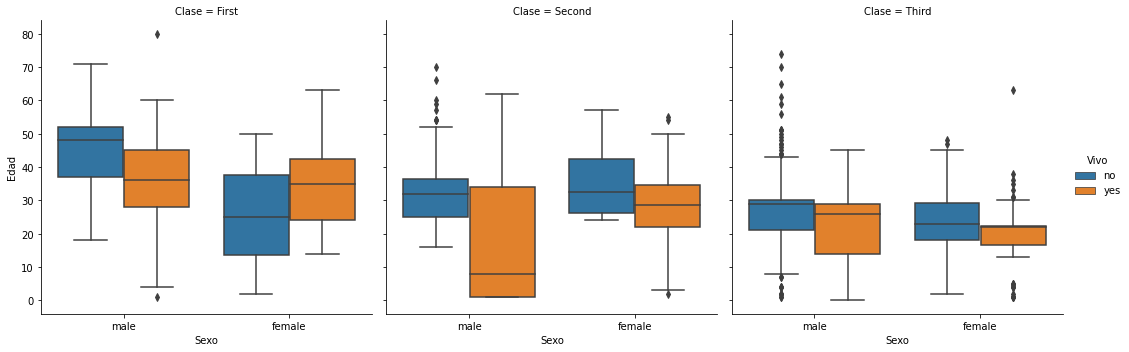

In [ ]:
# Variables gráfico.
x: str = str("Sexo")
y: str = str("Edad")
hue: str = str("Vivo")
col: str = str("Clase")
data = titanic

kind: str = str("box")
height: int = int(5)
aspect: float = float(1.0)



# Gráfico.
sns.catplot(x = x,
            y = y,
            hue = hue,
            col = col,
            data = data,
            kind = kind,
            height = height,
            aspect = aspect)

### Gráfico 4

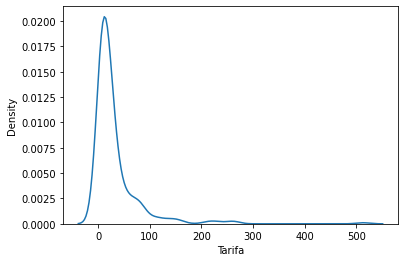

In [ ]:
sns.kdeplot(titanic.Tarifa)

### Gráfico 5

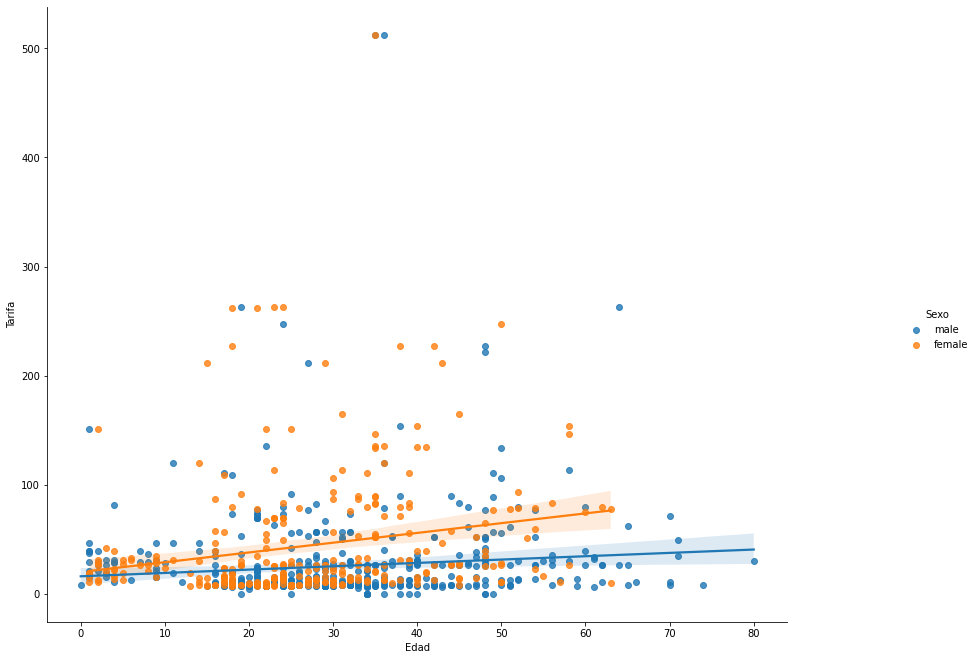

In [ ]:
# Variables gráfico.
x: str = str("Edad")
y: str = str("Tarifa")
data = titanic



# Gráfico.
sns.lmplot(x = x,
           y = y,
           hue = "Sexo",
           data = data)

plt.gcf().set_size_inches(15, 10)

### Gráfico 6

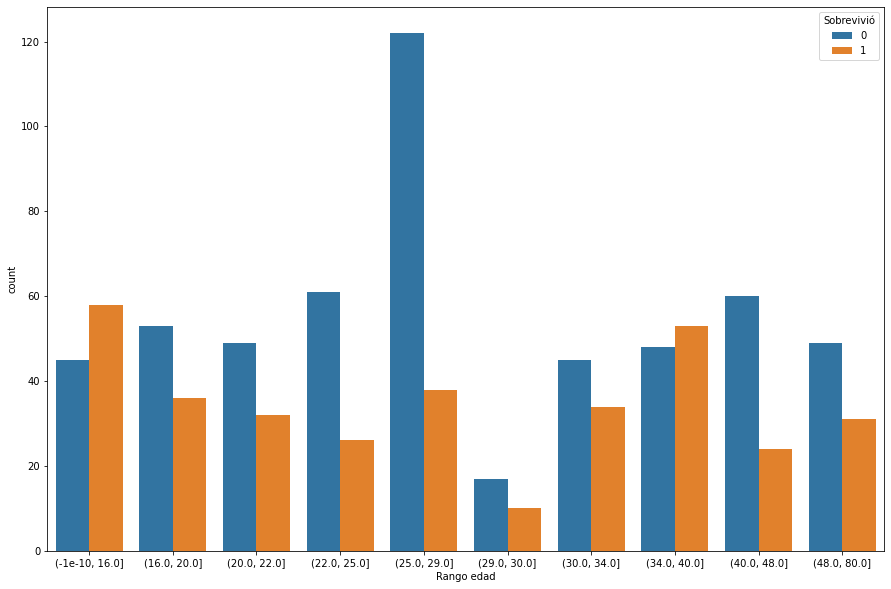

In [ ]:
ax = sns.countplot(x = titanic["Rango edad"],
                   data = titanic.groupby(by = "Sobrevivió").count(),
                   hue = titanic["Sobrevivió"])

plt.gcf().set_size_inches(15, 10)

### Gráfico 7

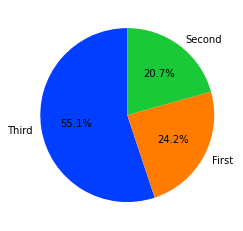

In [ ]:
# Variables gráfico.
data = titanic["pclass"].value_counts().tolist()
labels = titanic["Clase"].unique()

colors = sns.color_palette("bright")
autopct: str = str('%1.1f%%')
pctdistance: float = float(0.6)
shadow: bool = bool(False)
startangle: int = int(90)



# Gráfico.
plt.pie(x = data,
        labels = labels,
        colors = colors,
        autopct = autopct,
        pctdistance = pctdistance,
        shadow = shadow,
        startangle = startangle)

plt.show()

### Gráfico 8

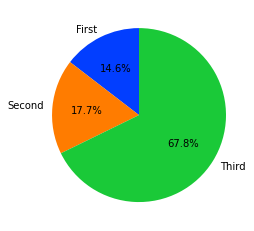

In [ ]:
# Variables gráfico.
data = pd.DataFrame(titanic[titanic.Vivo == "no"].groupby(by = 'Clase')['Vivo'].count())
labels = data.index

colors = sns.color_palette("bright")
autopct: str = str('%1.1f%%')
pctdistance: float = float(0.6)
shadow: bool = bool(False)
startangle: int = int(90)



# Gráfico.
plt.pie(x = np.array(data).ravel(),
        labels = labels,
        colors = colors,
        autopct = autopct,
        pctdistance = pctdistance,
        shadow = shadow,
        startangle = startangle)

plt.show()

### Gráfico 9

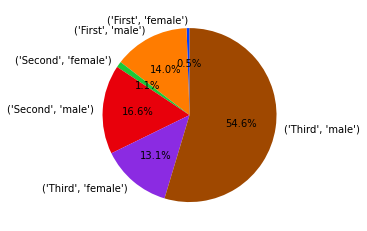

In [ ]:
# Variables gráfico.
data: data = pd.DataFrame(titanic[titanic.Vivo == "no"].groupby(by = ['Clase', 'Sexo'])['Vivo'].count())
labels: labels = data.index

colors = sns.color_palette("bright")
autopct: str = str('%1.1f%%')
pctdistance: float = float(0.6)
shadow: bool = bool(False)
startangle: int = int(90)



# Gráfico.
plt.pie(x = np.array(data).ravel(),
        labels = labels,
        colors = colors,
        autopct = autopct,
        pctdistance = pctdistance,
        shadow = shadow,
        startangle = startangle)

plt.show()

En el siguiente gráfico se muestra la comparación entre las personas que sovrevivieron (*yes*) y los que no sobrevivieron (*no*), separandolo en los siguientes grupos:
1. class.
2. sex.

### Gráfico 10

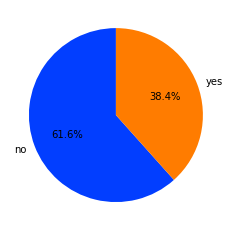

In [ ]:
# Variables gráfico.
data: data = titanic["Sobrevivió"].value_counts().tolist()
labels: labels = titanic["Vivo"].unique()

colors = sns.color_palette("bright")
autopct: str = str('%1.1f%%')
pctdistance: float = float(0.6)
shadow: bool = bool(False)
startangle: int = int(90)



# Gráfico.
plt.pie(x = data,
        labels = labels,
        colors = colors,
        autopct = autopct,
        pctdistance = pctdistance,
        shadow = shadow,
        startangle = startangle)

plt.show()

## Modelos

### Clasificación

In [ ]:
data = titanic[caracteristicas][1:] # X
clase = titanic["Sobrevivió"][1:] # Y

print(data, clase)

      Tarifa  Tostar  Edad  pclass  Sexo num  Hombre adulto num
1    71.2833       0    38       1         0                  0
2     7.9250       0    26       3         0                  0
3    53.1000       0    35       1         0                  0
4     8.0500       0    35       3         1                  1
5     8.4583       0    29       3         1                  1
..       ...     ...   ...     ...       ...                ...
886  13.0000       0    27       2         1                  1
887  30.0000       0    19       1         0                  0
888  23.4500       2    23       3         0                  0
889  30.0000       0    26       1         1                  1
890   7.7500       0    32       3         1                  1

[890 rows x 6 columns] 1      1
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Sobrevivió, Length: 890, dtype: int64


In [ ]:
rKFold = RepeatedKFold(
    n_splits = int(75),
    n_repeats = int(15),
    random_state = int(7) # Asegura que se obtenga las mismas muestras cada vez que se genera el conjunto de datos
)
n_iteraciones: int = int(0)

for p_entrenamiento, p_prueba in rKFold.split(data,clase):
  datos_entrenamiento, datos_prueba = data.iloc[p_entrenamiento], data.iloc[p_prueba]
  clasi_entrenamiento, clasi_prueba = clase.iloc[p_entrenamiento], clase.iloc[p_prueba]
  n_iteraciones += int(1)

print("El uso de datos para entrenamiento es {}, : {}".format(
    datos_entrenamiento.shape, clasi_entrenamiento.shape
))
print("El uso de datos para prueba es {}, : {}".format(
    datos_prueba.shape, clasi_prueba.shape
))
print("# iteraciones:", n_iteraciones)

El uso de datos para entrenamiento es (879, 6), : (879,)
El uso de datos para prueba es (11, 6), : (11,)
# iteraciones: 1125


In [ ]:
# Modelos de ML
# KNeighborsClassifier
# LogisticRegression
# SVC
# GaussianNB
# LinearDiscriminantAnalysis
# DecisionTreeClassifier
modelos: list = []
modelos.append(("KNC", KNeighborsClassifier()))
modelos.append(("LR", LogisticRegression()))
modelos.append(("SVC", SVC(gamma = "auto")))
modelos.append(("GNV", GaussianNB()))
modelos.append(("LDA", LinearDiscriminantAnalysis()))
modelos.append(("DTC", DecisionTreeClassifier()))

for nombre, modelo in modelos:
  modelo.fit(datos_entrenamiento, clasi_entrenamiento)
  resultado = modelo.score(datos_prueba, clasi_prueba)
  print("El modelo {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo = str(nombre),
      presi = float(resultado * 100)
  ))

El modelo KNC, tiene una presición de 81.818%
El modelo LR, tiene una presición de 63.636%
El modelo SVC, tiene una presición de 72.727%
El modelo GNV, tiene una presición de 63.636%
El modelo LDA, tiene una presición de 63.636%
El modelo DTC, tiene una presición de 90.909%


In [ ]:
modelos

[('KNC', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('SVC', SVC(gamma='auto')),
 ('GNV', GaussianNB()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('DTC', DecisionTreeClassifier())]

In [ ]:
modelo_final: list = modelos[5][1] # Obtener el modelo de la posición 1 y su modelo como tal
predict = modelo_final.predict(datos_prueba)
print(predict, "\n", clasi_prueba)

[0 0 0 1 0 0 0 0 0 1 1] 
 110    0
213    0
248    1
318    1
409    0
505    0
529    0
588    0
663    0
788    1
802    1
Name: Sobrevivió, dtype: int64


In [ ]:
modelo_final.feature_names_in_

array(['Tarifa', 'Tostar', 'Edad', 'pclass', 'Sexo num',
       'Hombre adulto num'], dtype=object)

In [ ]:
modelo_final

DecisionTreeClassifier()

In [ ]:
"""
Tarifa
Tostar
Edad
pclass
Sexo num
Hombre adulto num
"""

modelo_final.predict([[
    800,
    1,
    24,
    1,
    1,
    1
    ]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
# Para quitar el warning anterior
data_p = pd.DataFrame(np.array([
    800,
    1,
    24,
    1,
    1,
    1
    ]).reshape(1, -1),
    columns = caracteristicas)

modelo_final.predict(data_p)

array([1])

### Regresión

In [ ]:
# Acá su código

# Separando la información para entrenamiento
datos_entre = titanic[caracteristicas]
eti_temp = maxTemp
datos_entrenamiento, datos_prueba, eti_entrenamiento, eti_prueba = train_test_split(
    datos_entre,
    eti_temp,
    test_size = float(0.25),
    random_state = int(1)
)

print("Los datos para entrenamiento son:", datos_entrenamiento.shape)
print("Los datos para prueba son:", datos_prueba.shape)
print("Las etiquetas para entrenamiento son:", eti_entrenamiento.shape)
print("Las etiquetas para prueba son:", eti_prueba.shape)

Los datos para entrenamiento son: (668, 6)
Los datos para prueba son: (223, 6)
Las etiquetas para entrenamiento son: (668,)
Las etiquetas para prueba son: (223,)


In [ ]:
# Entrenamieto de los modelos
# DecisionTreeRegressor
# LinearRegression
# KNeighborsRegressor
# RandomForestRegressor 
modelos: list = []
modelos.append(("DecisionTreeRegressor", DecisionTreeRegressor()))
modelos.append(("LinearRegression", LinearRegression()))
modelos.append(("KNeighborsRegressor", KNeighborsRegressor()))
modelos.append(("RandomForestRegressor", RandomForestRegressor()))

for nombre,modelo in modelos:
  modelo.fit(datos_entrenamiento, eti_entrenamiento)
  resultado = modelo.score(datos_prueba, eti_prueba)
  print("El modelo {mol} tiene un rendimiento del {ren:.2f}%".format(
      mol = str(nombre),
      ren = float(resultado * 100)
  ))

El modelo DecisionTreeRegressor tiene un rendimiento del 11.87%
El modelo LinearRegression tiene un rendimiento del 34.82%
El modelo KNeighborsRegressor tiene un rendimiento del 15.05%
El modelo RandomForestRegressor tiene un rendimiento del 36.60%


In [ ]:
ndf = pd.DataFrame(
    {
        "original": eti_prueba.values,
    }
)
for nombre, modelo in modelos:
  ndf[nombre] = modelo.predict(datos_prueba)

In [ ]:
print(ndf)

     original  DecisionTreeRegressor  LinearRegression  KNeighborsRegressor  \
0           1               1.000000          0.907240                  0.2   
1           0               0.083333          0.051839                  0.2   
2           1               1.000000          0.839455                  0.6   
3           0               0.000000          0.619173                  0.0   
4           1               1.000000          0.757195                  0.4   
..        ...                    ...               ...                  ...   
218         1               1.000000          0.654988                  0.6   
219         0               1.000000          0.324236                  0.2   
220         1               1.000000          0.387332                  0.4   
221         0               0.000000          0.051798                  0.0   
222         1               0.000000          0.340196                  0.0   

     RandomForestRegressor  
0                 0.74

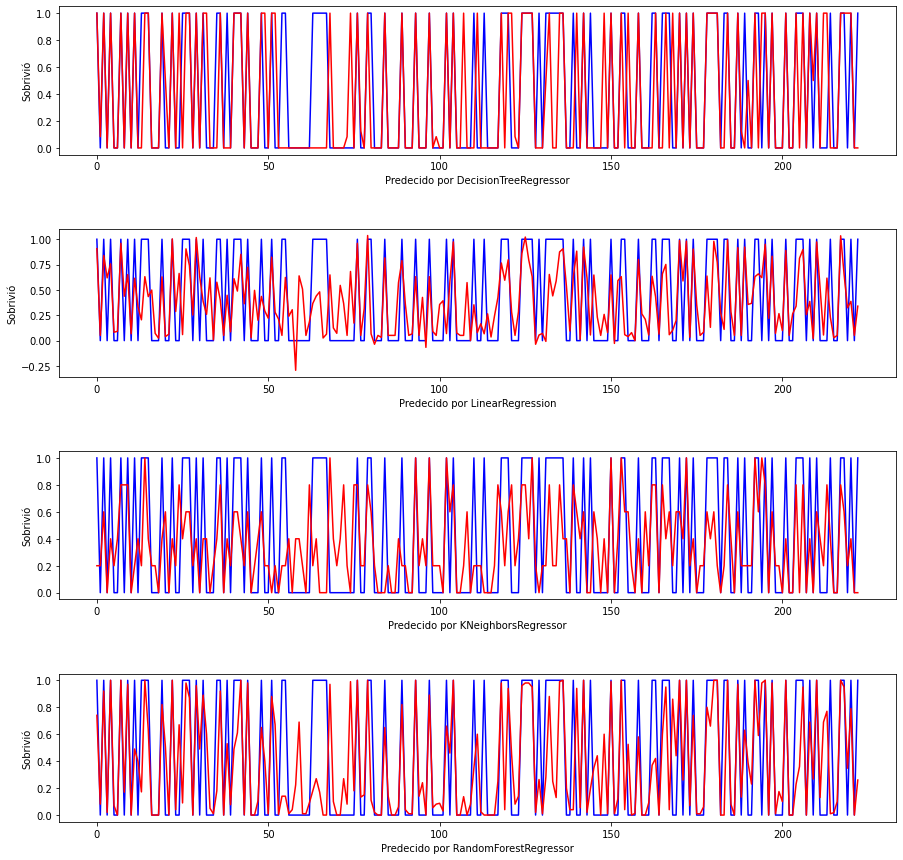

In [ ]:
plt.figure(
    figsize = (
        int(15),
        int(15)
    )
)

for pivote, modelo in enumerate(modelos):
  plt.subplot(
      len(modelos),
      1,
      pivote + 1
  )

  plt.subplots_adjust(
      hspace = float(0.5),
      wspace = int(1)
  )

  plt.plot(
      ndf["original"],
      color = "blue"
  )

  plt.plot(
      ndf[modelo[0]],
      color = "red"
  )

  plt.ylabel("Sobrivió")
  
  plt.xlabel("Predecido por {}".format(modelo[0]))